In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 8s 0us/step


In [7]:
# 데이터 shape 확인하기
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


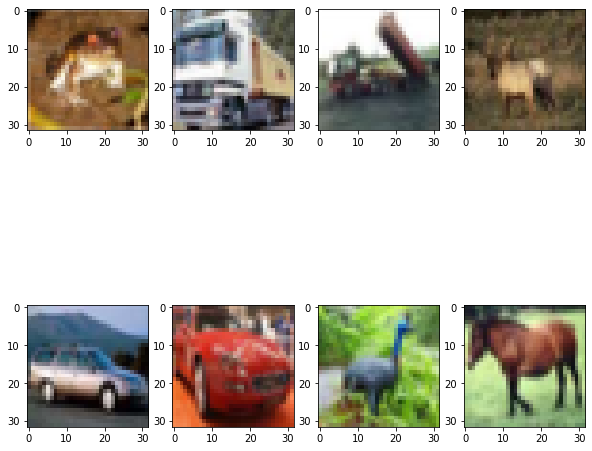

In [8]:
# 데이터 시각화
plt.figure(figsize=(10, 10))
for i, img in enumerate(x_train[:8]):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [9]:
# y_label one_hot_incording

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [42]:
# 정규화
x_train = x_train.reshape(-1, 32, 32, 3)
x_train_norm = x_train.reshape(-1, 32,32, 3)/255

x_test = x_test.reshape(-1, 32, 32, 3)
x_test_norm = x_test.reshape(-1,32, 32, 3)/255

In [37]:
input_layer = tf.keras.layers.Input(shape = (32, 32, 3))
x = tf.keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs = [input_layer], outputs = [out_layer])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0   

In [46]:
loss= tf.keras.losses.categorical_crossentropy
optimizer= tf.keras.optimizers.RMSprop(lr=0.0001)
metrics= tf.keras.metrics.categorical_accuracy

model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [39]:
from tensorflow.python.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=7)

In [40]:
history = model.fit(x_train_norm, y_train, validation_split=0.2, epochs=5, batch_size=200, verbose=1, callbacks=early_stopping)

Epoch 1/5
 79/200 [==========>...................] - ETA: 52s - loss: 2.1157 - categorical_accuracy: 0.2478

KeyboardInterrupt: ignored

In [44]:
#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test_norm, y_test)[1]))

313/313 [==============================] - 7s 23ms/step - loss: 1.9246 - categorical_accuracy: 0.3342

 Test Accuracy: 0.3342


In [31]:
from keras.layers import BatchNormalization, Dropout

In [32]:
input_layer = tf.keras.layers.Input(shape = (32, 32, 3))
x = tf.keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
out_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs = [input_layer], outputs = [out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0   

In [33]:
loss= tf.keras.losses.categorical_crossentropy
optimizer= tf.keras.optimizers.RMSprop(lr=0.0001)
metrics= tf.keras.metrics.categorical_accuracy

model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [34]:
history = model.fit(x_train_norm, y_train, validation_split=0.2, epochs=5, batch_size=200, verbose=1)

Epoch 1/5
200/200 [==============================] - 116s 575ms/step - loss: 1.8853 - categorical_accuracy: 0.3690 - val_loss: 3.8366 - val_categorical_accuracy: 0.1590
Epoch 2/5
200/200 [==============================] - 115s 574ms/step - loss: 1.4197 - categorical_accuracy: 0.4948 - val_loss: 2.1935 - val_categorical_accuracy: 0.3309
Epoch 3/5
200/200 [==============================] - 115s 573ms/step - loss: 1.2573 - categorical_accuracy: 0.5554 - val_loss: 1.2638 - val_categorical_accuracy: 0.5604
Epoch 4/5
200/200 [==============================] - 115s 573ms/step - loss: 1.1462 - categorical_accuracy: 0.5960 - val_loss: 1.0953 - val_categorical_accuracy: 0.6193
Epoch 5/5
200/200 [==============================] - 115s 576ms/step - loss: 1.0572 - categorical_accuracy: 0.6286 - val_loss: 1.0596 - val_categorical_accuracy: 0.6246


In [43]:
#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test_norm, y_test)[1]))

313/313 [==============================] - 7s 23ms/step - loss: 1.9246 - categorical_accuracy: 0.3342

 Test Accuracy: 0.3342
